# Introduction:

# 1-
Explore match day statistics of every game and every team during the 2021-2022 season of the English Premier League! 

Data includes data, teams, referee, and stats by home and away side .

The 2021–22 Premier League was the 30th season of the Premier League, the top English professional league for association football clubs since its establishment in 1992, and the 123rd season of top-flight English football overall. The start and end dates for the season were released on March 25, 2021, and the fixtures were released on June 16, 2021.
Manchester City successfully defended their title, securing a sixth Premier League title and eighth English league title overall on the final day of the season.


# 2-
https://www.kaggle.com/datasets/evangower/premier-league-match-data

# 3-
 1-Date:The date when match was played
 2-HomeTeam:The home team
 3-AwayTeam:The away team
 4-FTHG:Full time home goals
 5-FTAG:Full time away goals
 6-FTR:Full time result
 7-HTHG:Halftime home goals
 8-HTAG:Halftime away goals
 9-HTR:Halftime results
 10-Referee:Referee of the match

# Libraries and Reading the Data:

In [127]:
# Import necessary packages
import numpy as np 
# Loading librariesand importing data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from plotly import graph_objs as go



In [128]:
#csv reading
df=pd.read_csv("/content/prediction (1).csv")
df

,Match Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
3,14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
4,14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,NaN,5,man city,3


In [129]:
df.head()

,Match Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
3,14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
4,14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6


# Data describing

In [130]:
#data describe
df.describe()


,FTHG,FTAG,HTHG,HTAG,total of goals in match,ToatlHandAGoal
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.571053,3.142105,0.681579,0.586842,4.713158,3.457895
std,1.369746,2.125561,0.832187,0.809140,2.647114,1.972319
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,4.000000,3.000000
75%,2.000000,6.000000,1.000000,1.000000,7.000000,6.000000
max,7.000000,9.000000,4.000000,4.000000,14.000000,9.000000


# Rename columns

In [131]:
#Display the head of your dataset.
df = df.rename(columns={"Date":"Match Date"})
df.head()

,Match Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
3,14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
4,14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6


# Cleaning Data

In [132]:
#Drop duplicated data and check if there any left
df=df.drop_duplicates()
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
375    False
376    False
377    False
378    False
379    False
Length: 380, dtype: bool

In [133]:
#Error Handling
list1=[]
list2=[]
list3=[]
import random
for i,j,w in zip(df['FTHG'],df['FTAG'],df['FTR']):

  if i>9 or j>9:
    x=random.randint(4,9)
    y=random.randint(4,9)
    df['FTHG']=df['FTHG'].replace(i,x,regex=True)
    df['FTAG']=df['FTAG'].replace(j,y,regex=True)
i=0
j=0
w=0
for i,j,w in zip(df['FTHG'],df['FTAG'],df['FTR']):
  df['FTR']=df['FTR'].replace(w,"",regex=True)
  df['FTHG']=df['FTHG'].replace(i," ",regex=True)
  df['FTAG']=df['FTAG'].replace(j,"",regex=True)
  list1.append(i)
  list2.append(j)
print(list1)
for w,v in zip(list1,list2):
  if w>v:
      w="H"
      list3.append(w)
  elif w<v:
    w="A"
    list3.append(w)
  else:
    w="D"
    list3.append(w)
df['FTHG']=list1
df['FTAG']=list2
df['FTR']=list3
df

[2, 5, 1, 3, 4, 1, 3, 0, 2, 1, 2, 2, 0, 2, 5, 2, 1, 0, 0, 4, 5, 1, 0, 2, 1, 2, 1, 1, 4, 0, 3, 1, 0, 0, 4, 0, 0, 3, 0, 3, 1, 0, 1, 3, 0, 1, 3, 2, 1, 0, 0, 0, 2, 1, 2, 1, 3, 0, 4, 1, 1, 0, 3, 1, 2, 2, 2, 2, 1, 2, 0, 2, 4, 2, 0, 1, 0, 0, 2, 2, 2, 7, 1, 2, 1, 2, 1, 1, 1, 0, 2, 3, 2, 3, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 2, 4, 1, 7, 3, 2, 2, 1, 4, 0, 0, 1, 4, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 3, 3, 1, 1, 0, 1, 2, 7, 3, 2, 2, 2, 1, 3, 3, 1, 0, 0, 4, 3, 0, 7, 0, 2, 2, 1, 3, 1, 0, 0, 2, 4, 0, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1, 0, 4, 1, 0, 2, 2, 2, 3, 2, 0, 4, 2, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 1, 0, 2, 5, 1, 2, 0, 0, 0, 3, 2, 2, 2, 2, 1, 1, 4, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 4, 0, 2, 1, 0, 1, 2, 4, 5, 1, 1, 4, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 2, 0, 0, 1, 1, 2, 1, 2, 5, 3, 3, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 3, 1, 1, 2, 1, 4, 2, 1, 1, 3, 2, 3, 0, 5, 0, 0, 2, 1, 1, 2, 0, 1, 0, 

,Match Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
3,14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
4,14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,NaN,5,man city,3


In [134]:
# check for null values before cleaning the data
df.isnull().sum()

Match Date                  0
HomeTeam                    0
AwayTeam                    0
FTHG                        0
FTAG                        0
FTR                         0
HTHG                        0
HTAG                        0
HTR                         0
Referee                    35
total of goals in match     0
Final                       0
ToatlHandAGoal              0
dtype: int64

In [135]:
#fill null in Referee columns 
#df['Referee'].fillna(method="ffill",inplace=True)
#df

In [136]:
# check for null values after cleaning the data
print("The number of Null values after cleaning the data: \n",df.isnull().sum())


The number of Null values after cleaning the data: 
 Match Date                  0
HomeTeam                    0
AwayTeam                    0
FTHG                        0
FTAG                        0
FTR                         0
HTHG                        0
HTAG                        0
HTR                         0
Referee                    35
total of goals in match     0
Final                       0
ToatlHandAGoal              0
dtype: int64


In [137]:
# Drop Referee
#df.drop('Referee',inplace=True,axis=1)
#df

# Pandas aggregate functions:

In [138]:
#SUM
df ["FTHG"].sum()


597

In [139]:
#MIN
df ["FTHG"].min()

0

In [140]:
#MAX
df ["FTHG"].max()

7

In [141]:
#MEDIAM
df ["FTHG"].median()

1.0

In [142]:
#MEAN
df ["FTHG"].mean()

1.5710526315789475

# make a new columns

In [143]:
#make a new columns
df['total of goals in match']=df['FTAG']+df['FTHG']
df

,Match Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
3,14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
4,14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,NaN,5,man city,3


# line chart

HomeTeam
Arsenal           AxesSubplot(0.125,0.125;0.775x0.755)
Aston Villa       AxesSubplot(0.125,0.125;0.775x0.755)
Brentford         AxesSubplot(0.125,0.125;0.775x0.755)
Brighton          AxesSubplot(0.125,0.125;0.775x0.755)
Burnley           AxesSubplot(0.125,0.125;0.775x0.755)
Chelsea           AxesSubplot(0.125,0.125;0.775x0.755)
Crystal Palace    AxesSubplot(0.125,0.125;0.775x0.755)
Everton           AxesSubplot(0.125,0.125;0.775x0.755)
Leeds             AxesSubplot(0.125,0.125;0.775x0.755)
Leicester         AxesSubplot(0.125,0.125;0.775x0.755)
Liverpool         AxesSubplot(0.125,0.125;0.775x0.755)
Man City          AxesSubplot(0.125,0.125;0.775x0.755)
Man United        AxesSubplot(0.125,0.125;0.775x0.755)
Newcastle         AxesSubplot(0.125,0.125;0.775x0.755)
Norwich           AxesSubplot(0.125,0.125;0.775x0.755)
Southampton       AxesSubplot(0.125,0.125;0.775x0.755)
Tottenham         AxesSubplot(0.125,0.125;0.775x0.755)
Watford           AxesSubplot(0.125,0.125;0.775x0.755)
W

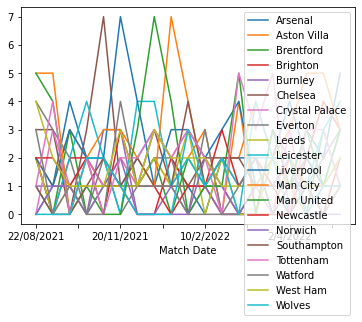

In [144]:
df.set_index('Match Date', inplace=True)
df.groupby('HomeTeam')['FTHG'].plot(legend=True)

# line chart

AwayTeam
Arsenal           AxesSubplot(0.125,0.125;0.775x0.755)
Aston Villa       AxesSubplot(0.125,0.125;0.775x0.755)
Brentford         AxesSubplot(0.125,0.125;0.775x0.755)
Brighton          AxesSubplot(0.125,0.125;0.775x0.755)
Burnley           AxesSubplot(0.125,0.125;0.775x0.755)
Chelsea           AxesSubplot(0.125,0.125;0.775x0.755)
Crystal Palace    AxesSubplot(0.125,0.125;0.775x0.755)
Everton           AxesSubplot(0.125,0.125;0.775x0.755)
Leeds             AxesSubplot(0.125,0.125;0.775x0.755)
Leicester         AxesSubplot(0.125,0.125;0.775x0.755)
Liverpool         AxesSubplot(0.125,0.125;0.775x0.755)
Man City          AxesSubplot(0.125,0.125;0.775x0.755)
Man United        AxesSubplot(0.125,0.125;0.775x0.755)
Newcastle         AxesSubplot(0.125,0.125;0.775x0.755)
Norwich           AxesSubplot(0.125,0.125;0.775x0.755)
Southampton       AxesSubplot(0.125,0.125;0.775x0.755)
Tottenham         AxesSubplot(0.125,0.125;0.775x0.755)
Watford           AxesSubplot(0.125,0.125;0.775x0.755)
W

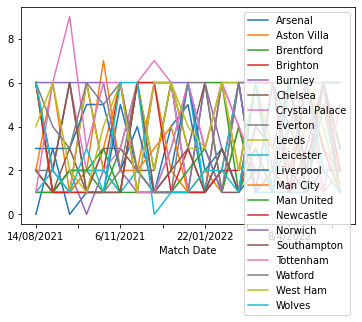

In [145]:
df.to_csv("/content/prediction (1).csv")
df2=pd.read_csv("/content/prediction (1).csv")
df2.set_index('Match Date', inplace=True)
df2.groupby('AwayTeam')['FTAG'].plot(legend=True)


# Bar Chart

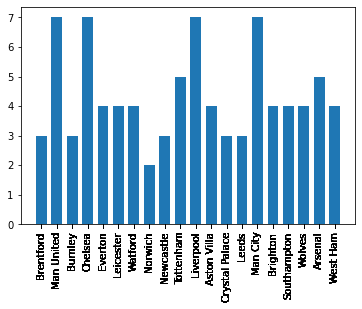

In [146]:
plt.bar(df['HomeTeam'],df['FTHG'],width=.7)
plt.xticks(df['HomeTeam'],rotation=90)
plt.show()

# Bar chart

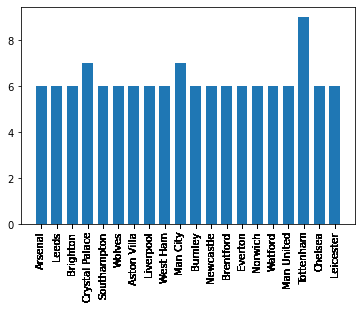

In [147]:
plt.bar(df['AwayTeam'],df['FTAG'],width=.7)
plt.xticks(df['AwayTeam'],rotation=90)
plt.show()

# Bar chart

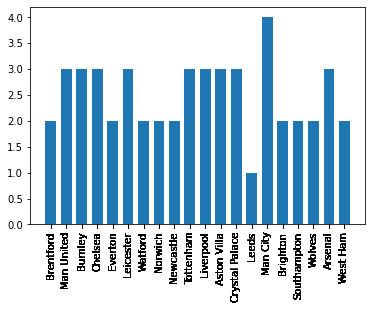

In [148]:
plt.bar(df['HomeTeam'], df['HTHG'],width=.7)
plt.xticks(df['HomeTeam'],rotation=90) 
plt.show()

# Bar chart

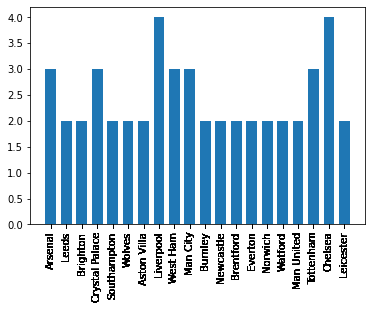

In [149]:
plt.bar(df['AwayTeam'], df['HTAG'],width=.7)
plt.xticks(df['AwayTeam'],rotation=90) 
plt.show()

# Scatter chart

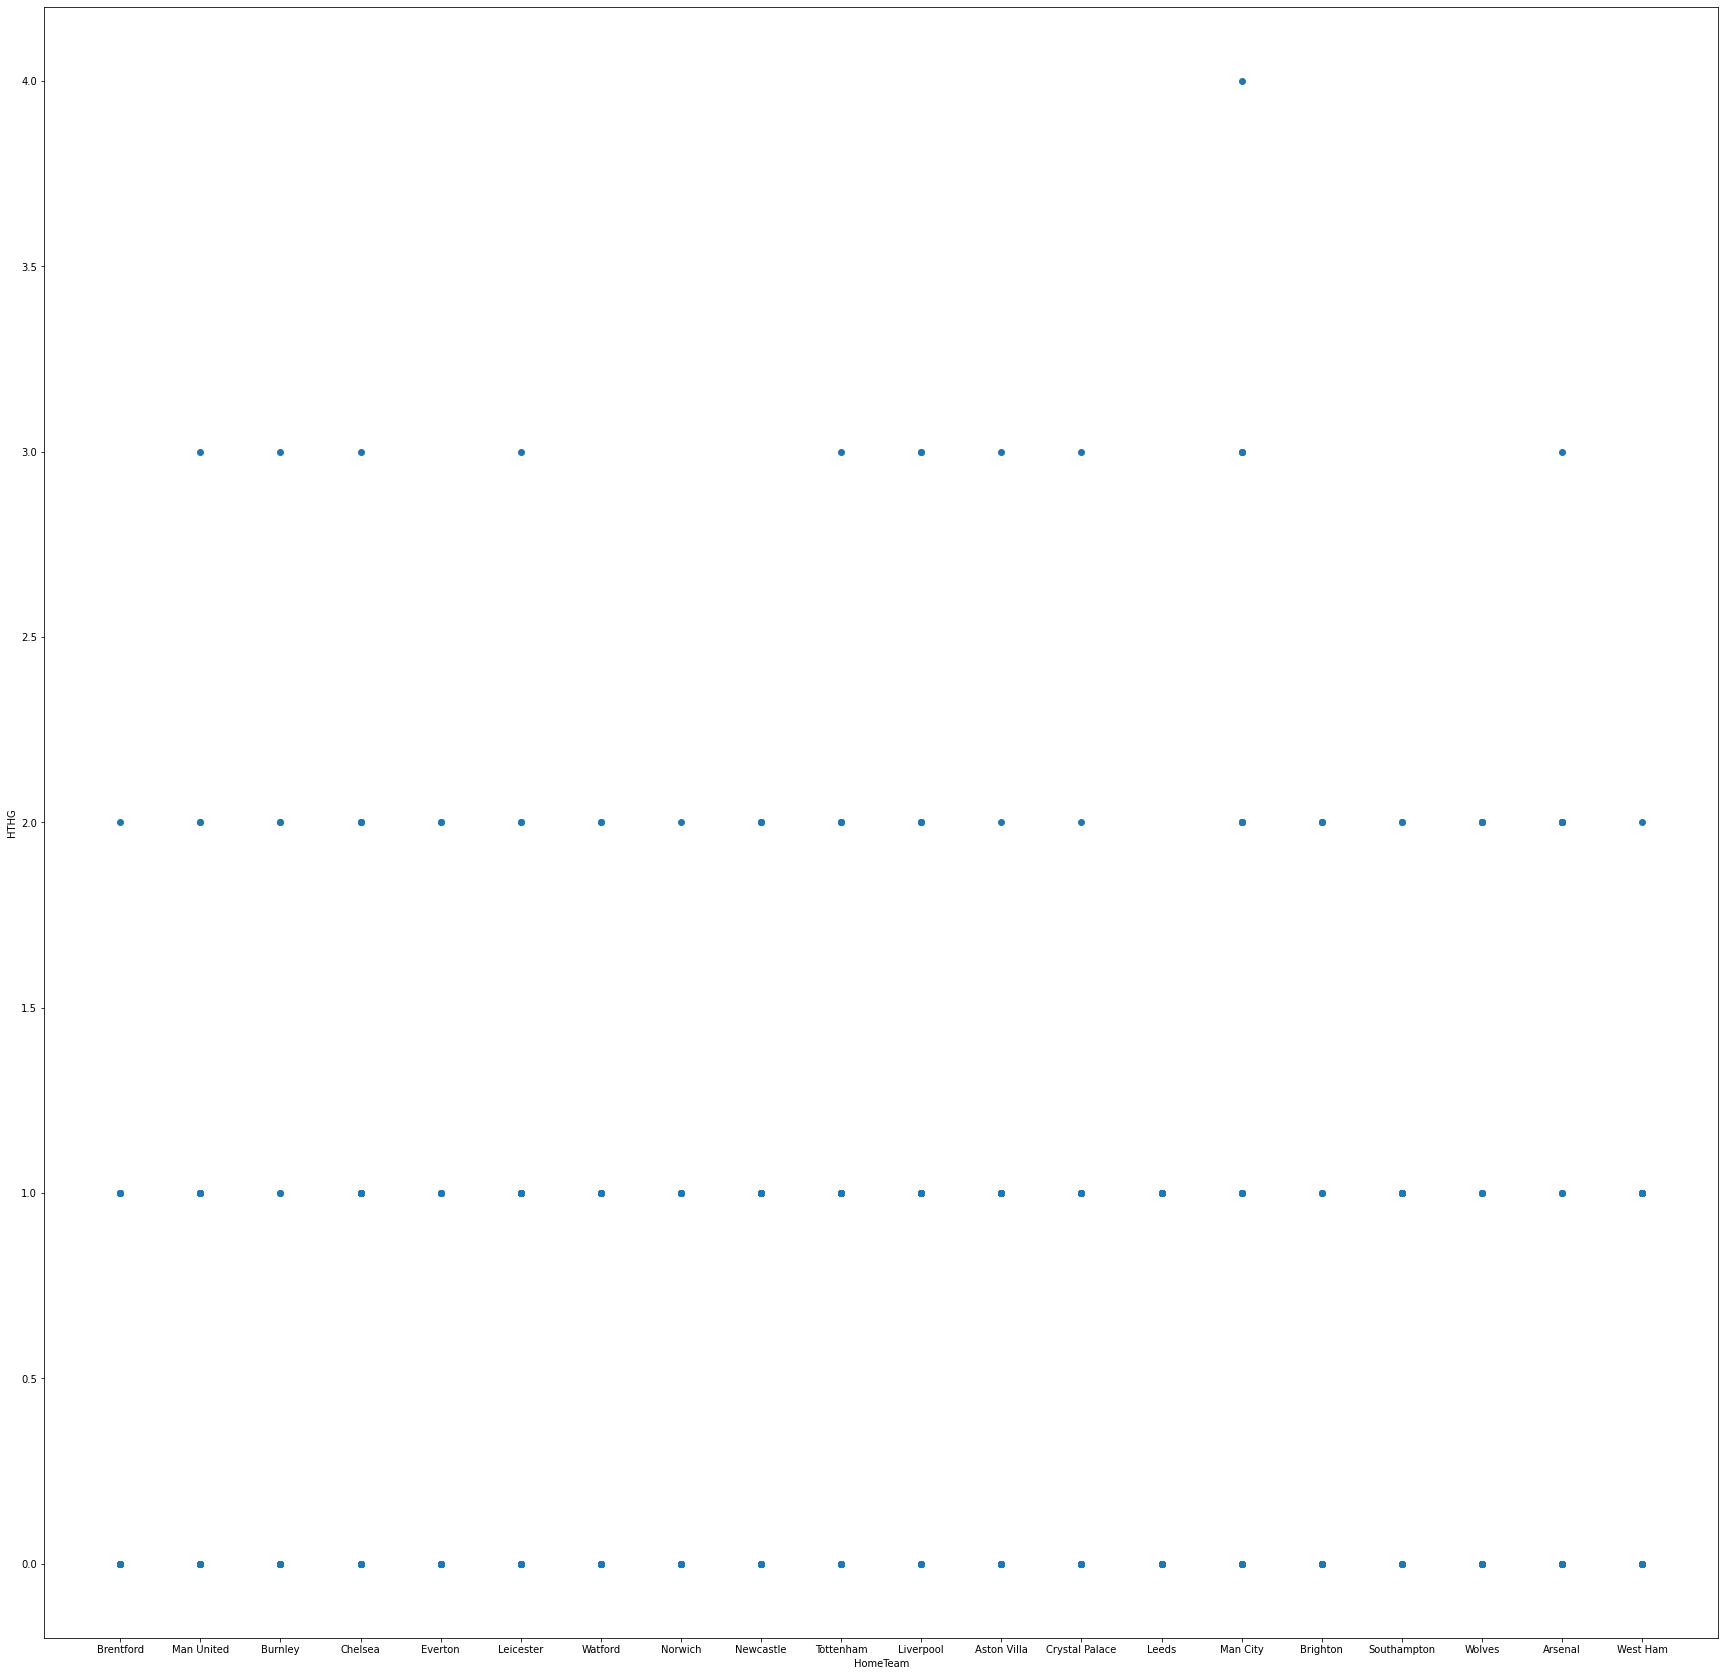

In [150]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(x = df['HomeTeam'], y = df['HTHG'])
plt.xlabel("HomeTeam")
plt.ylabel("HTHG")

plt.show()

# Bar chart

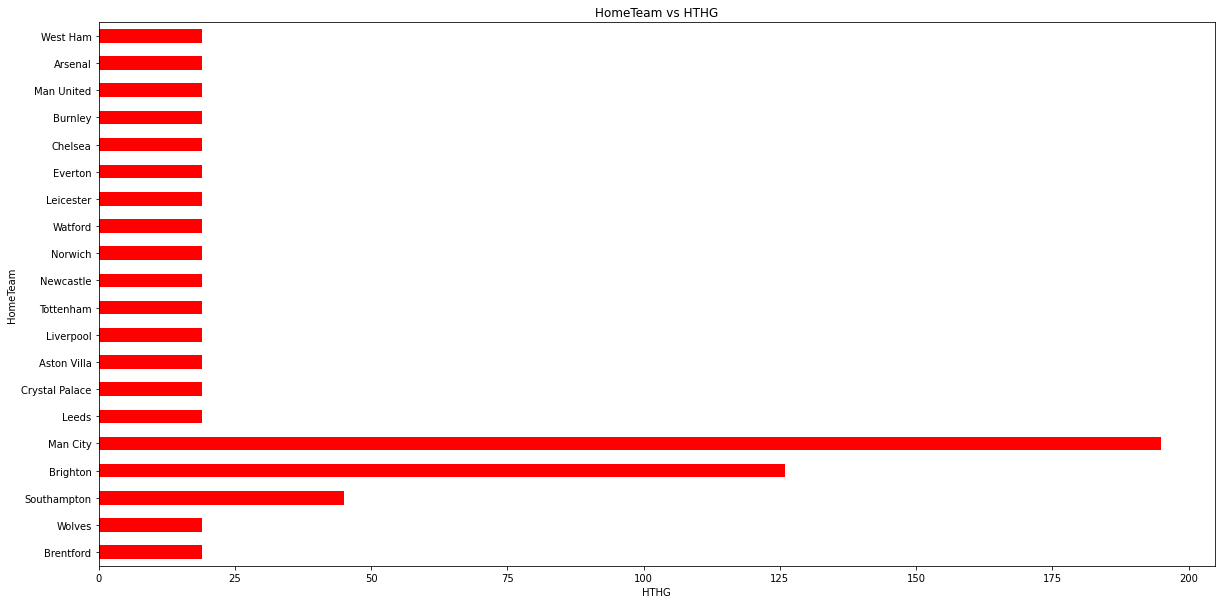

In [151]:
## Plot these for better visualization
FTHG_df = df['HTHG'].value_counts(ascending=True)
HomeTeam_df = df['HomeTeam'].value_counts(ascending=True)
## Some formatting to make it look nicer

fig=plt.figure(figsize=(20, 10))
plt.title("HomeTeam vs HTHG")
plt.xlabel("HTHG")
plt.ylabel("HomeTeam")
ax = FTHG_df.plot(kind='barh',color='r')
ay = HomeTeam_df.plot(kind='barh',color='r')

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) ))

# Heatmap chart

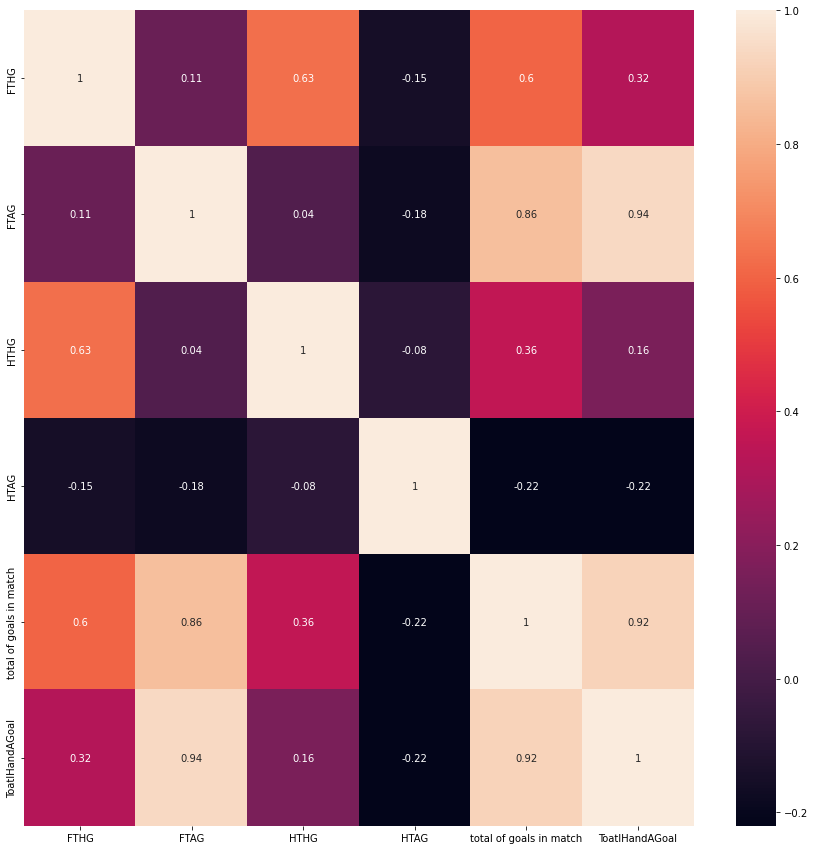

In [152]:
#Show the correlation between variables
cor = df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(data=cor,annot=True) #sns: seaborn
plt.show()

# pin chart

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


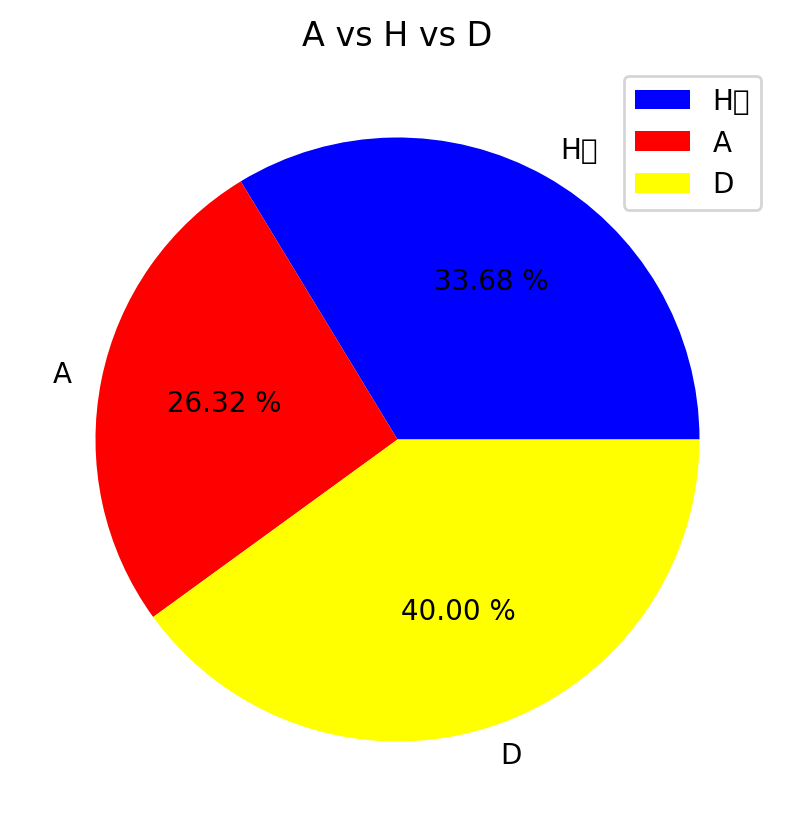

In [153]:
H = df.loc[df['HTR'] == 'H'].count()[0]
A = df.loc[df['HTR'] == 'A'].count()[0]
D = df.loc[df['HTR'] == 'D'].count()[0]

plt.figure(figsize=(8,5), dpi = 200)
plt.pie([H,A,D], labels = ['H	', 'A','D'], autopct = "% .2f %%", colors = ['blue', 'red','yellow'])
plt.title('A vs H vs D')
plt.legend()
plt.show()

# pin chart

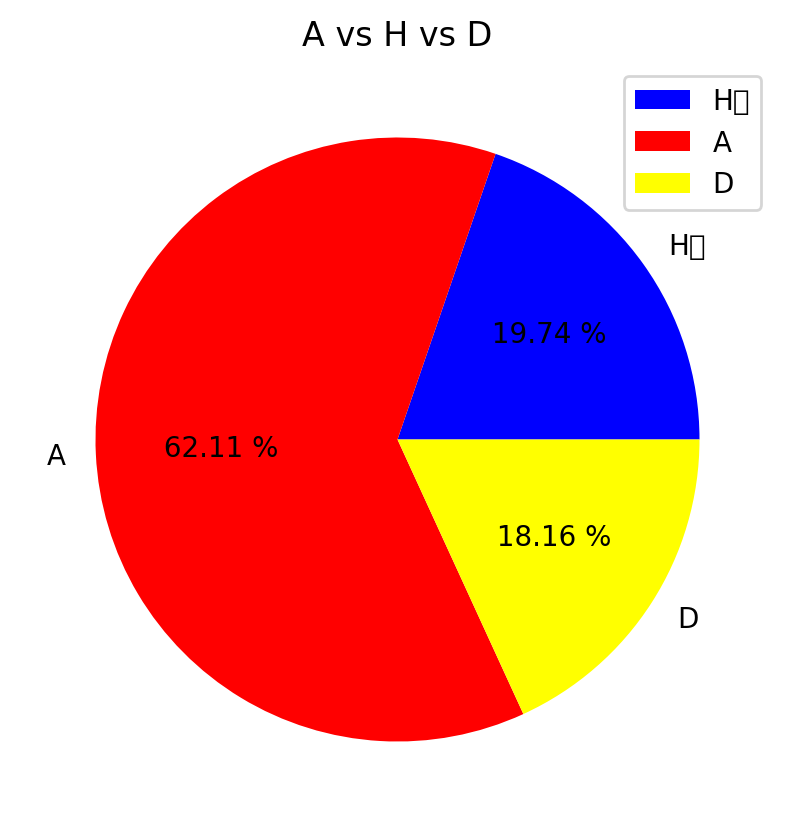

In [154]:
H = df.loc[df['FTR'] == 'H'].count()[0]
A = df.loc[df['FTR'] == 'A'].count()[0]
D = df.loc[df['FTR'] == 'D'].count()[0]

plt.figure(figsize=(8,5), dpi = 200)
plt.pie([H,A,D], labels = ['H	', 'A','D'], autopct = "% .2f %%", colors = ['blue', 'red','yellow'])
plt.title('A vs H vs D')
plt.legend()
plt.show()

# map chart

In [155]:
from folium.plugins import HeatMap
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.HomeTeam), list(sample_df.AwayTeam)))


In [156]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [159]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
Match Date,,,,,,,,,,,,
13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,Brentford,2
14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...
22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3


In [160]:
list5=[]
for i,j,w in zip(df['FTR'],df['AwayTeam'],df['HomeTeam']):
            if i=='A':
              print(j)
              list5.append(j)
            elif i=='H':
              print(w)
              list5.append(w)

            else:
               print("Draw")
               list5.append("Draw")
names_lower = [name.lower() for name in list5]
print(names_lower)

Brentford
Man United
Brighton
Crystal Palace
Southampton
Wolves
Watford
Liverpool
West Ham
Man City
Burnley
Newcastle
Brentford
Draw
Norwich
Watford
Draw
Tottenham
Chelsea
West Ham
Man City
Draw
Everton
Draw
Leicester
Draw
Draw
Draw
Draw
Man United
Tottenham
Norwich
Brighton
Man City
Man United
West Ham
Wolves
Aston Villa
Liverpool
Everton
Draw
Brentford
Burnley
Crystal Palace
Southampton
Watford
Everton
Brighton
Man United
Chelsea
Man City
Aston Villa
Norwich
West Ham
Draw
Draw
Draw
Wolves
Tottenham
Draw
Draw
Norwich
Chelsea
Watford
Wolves
Brighton
Draw
Tottenham
Brentford
Draw
Liverpool
Wolves
Leicester
Man City
Brighton
Leeds
Chelsea
West Ham
Tottenham
Draw
Aston Villa
Chelsea
Draw
Watford
Draw
Draw
Man City
Leicester
Tottenham
Liverpool
Leicester
Burnley
Draw
Man City
Chelsea
Southampton
Man United
Leeds
West Ham
Wolves
Aston Villa
Man City
Norwich
Draw
Wolves
Draw
Watford
Tottenham
Draw
West Ham
Chelsea
Brighton
Draw
Draw
Norwich
Watford
West Ham
Liverpool
Man City
Tottenham
Newca

In [161]:
df['Final']=names_lower
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
Match Date,,,,,,,,,,,,
13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,brentford,2
14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...
22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3


In [162]:
list6=[]
for i ,j in zip(df['FTHG'],df['FTAG']):
  if i>j:
    list6.append(i)
  elif i<j:
    list6.append(j)
  else:
    list6.append(i)
df['ToatlHandAGoal']=list6
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,total of goals in match,Final,ToatlHandAGoal
Match Date,,,,,,,,,,,,
13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,2,brentford,2
14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,6,man united,5
14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,3,brighton,2
14/08/2021,Chelsea,Crystal Palace,3,6,A,2,0,H,J Moss,9,crystal palace,6
14/08/2021,Everton,Southampton,4,6,A,0,0,D,A Madley,10,southampton,6
...,...,...,...,...,...,...,...,...,...,...,...,...
22/05/2022,Crystal Palace,Man United,1,6,A,1,0,H,M Atkinson,7,man united,6
22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,5,leicester,4
22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,4,liverpool,3


In [163]:
teams=[]
for i in df['HomeTeam']:
  teams.append(i)
teams= list(dict.fromkeys(teams))
teams

['Brentford',
 'Man United',
 'Burnley',
 'Chelsea',
 'Everton',
 'Leicester',
 'Watford',
 'Norwich',
 'Newcastle',
 'Tottenham',
 'Liverpool',
 'Aston Villa',
 'Crystal Palace',
 'Leeds',
 'Man City',
 'Brighton',
 'Southampton',
 'Wolves',
 'Arsenal',
 'West Ham']

In [164]:
import csv
per = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
lines  = ""
rows = ""
draw_v = 0.0
win_v = 0.0
loss_v = 0.0
win_per = 0.0
draw_per = 0.0
loss_per = 0.0
j = 0 
z = 0
i = 0
draw = 0
win = 0
loss = 0
s = 0
v = 0.0
for j in range(20):
    with open("/content/prediction (1).csv","r") as f:
      rows = csv.reader(f)
      for row in rows:
        if row[1] == teams[j]:
          i += 1
          if row[11] == "draw":
            draw += 1
          elif row[3] > row[4]:
            win += 1
          elif row[3] < row[4]:
            loss += 1
        elif row[2] == teams[j]:
          i += 1
          if row[11] == "draw":
            draw += 1
          elif row[3] < row[4]:
            win += 1
          elif row[3] > row[4]:
            loss += 1
      for m in range(i+1):
        s = s + m
    with open("/content/prediction (1).csv","r") as f:
      rows = csv.reader(f)
      for row in rows:
        if row[1] == teams[j]:
          if row[11] == "draw":
            draw_v = draw_v + (v/s)
            v += 1
          elif row[3] > row[4]:
            win_v = win_v + (v/s)
            v += 1
          elif row[3] < row[4]:
            loss_v = loss_v + (v/s)
            v += 1
        elif row[2] == teams[j]:
          if row[11] == "draw":
            draw_v = draw_v + (v/s)
            v += 1
          elif row[3] < row[4]:
            win_v = win_v + (v/s)
            v += 1
          elif row[3] > row[4]:
            loss_v = loss_v + (v/s)
            v += 1
    win_per = win_v 
    draw_per = draw_v 
    loss_per = loss_v 
    print(teams[j],'percentages: win per =', win_per, ', draw per =', draw_per, ', loss per =', loss_per)
    per[j] = win_per
    draw_v = 0
    win_v = 0
    loss_v = 0
    win_per = 0
    draw_per = 0
    loss_per = 0
    i = 0
    draw = 0
    win = 0
    loss = 0
    s = 0
    m = 0
    v = 0.0      

Brentford percentages: win per = 0.37112010796221323 , draw per = 0.04318488529014845 , loss per = 0.534412955465587
Man United percentages: win per = 0.3846153846153847 , draw per = 0.23751686909581649 , loss per = 0.3265856950067476
Burnley percentages: win per = 0.32793522267206476 , draw per = 0.19433198380566802 , loss per = 0.42645074224021595
Chelsea percentages: win per = 0.4574898785425101 , draw per = 0.27395411605937925 , loss per = 0.21727395411605938
Everton percentages: win per = 0.2901484480431849 , draw per = 0.07152496626180838 , loss per = 0.5870445344129555
Leicester percentages: win per = 0.3130904183535763 , draw per = 0.22537112010796223 , loss per = 0.41025641025641024
Watford percentages: win per = 0.3333333333333333 , draw per = 0.033738191632928474 , loss per = 0.5816464237516868
Norwich percentages: win per = 0.33738191632928477 , draw per = 0.09581646423751687 , loss per = 0.5155195681511471
Newcastle percentages: win per = 0.4520917678812416 , draw per = 0.

In [165]:
x = 0
y = ''
print(per)
for i in range(20):
  if per[i] > x:
    x = per[i]
    y = teams[i]
print(y ,', with win percentage equal', x)

[0.37112010796221323, 0.3846153846153847, 0.32793522267206476, 0.4574898785425101, 0.2901484480431849, 0.3130904183535763, 0.3333333333333333, 0.33738191632928477, 0.4520917678812416, 0.5263157894736842, 0.47773279352226716, 0.3225371120107962, 0.25371120107962214, 0.39676113360323884, 0.6342780026990553, 0.3481781376518218, 0.23751686909581646, 0.42645074224021595, 0.5964912280701754, 0.4507422402159244]
Man City , with win percentage equal 0.6342780026990553


## **line chart after ml:**

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


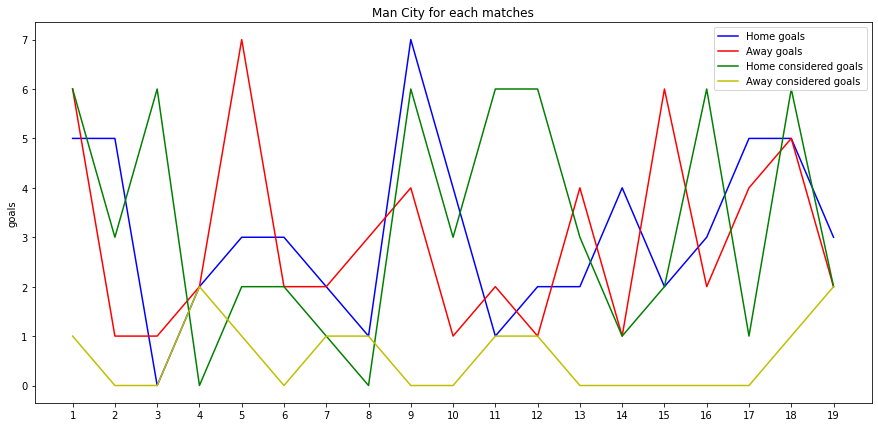

In [166]:
home = df[df.HomeTeam == 'Man City'][['HomeTeam','FTHG','FTAG','HTHG','HTAG']]
away = df[df.AwayTeam == 'Man City'][['AwayTeam','FTHG','FTAG','HTHG','HTAG']]
X = list(range(1,len(home)+1))
print(X)
y = home['FTHG']
z = away['FTAG']
ya = home['FTAG']
za = away['FTHG']
plt.figure(figsize=(15, 7))
plt.plot(X, y, color='b', label='Home goals')
plt.plot(X, z, color='r', label='Away goals')
plt.plot(X, ya, color='g', label='Home considered goals')
plt.plot(X, za, color='y', label='Away considered goals')
plt.ylabel("goals")
plt.title("Man City for each matches")
plt.xticks(range(1,len(home)+1))
plt.legend()
plt.show()